# Predictive Analytics: Assignment 4.2
#### Joshua Greenert
#### DSC630-T301 Predictive Analytics
#### 1/2/2023

In [79]:
# Import the required libaries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pull in the data to begin preparation.
df_als = pd.read_csv('als_data.csv')
df_als.head(5)

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [80]:
# Start by creating a correlation matrix.
corr_matrix = df_als.corr()

# Make a heatmap from data so it's easier to see the correlations.
corr_matrix.style.background_gradient(cmap='coolwarm')

In [81]:
# Remove any data that is not relevant to the patient’s ALS condition.
# Items to drop: items with < 60%
df_als_new = df_als.drop(["ID", "Age_mean", "Albumin_range", "Bicarbonate_range", "Blood.Urea.Nitrogen..BUN._range",
                          "bp_diastolic_range","bp_systolic_range", "Calcium_max", "Calcium_median", "Calcium_min", "Calcium_range",
                          "Creatinine_range", "Glucose_min", "onset_delta_mean", "pulse_range", "respiratory_max",
                          "respiratory_median", "respiratory_min", "respiratory_range", "SubjectID", "Urine.Ph_max",
                          "Urine.Ph_median", "Urine.Ph_min"], axis=1)

In [82]:
# Apply a standard scalar to the data.
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()

# transform data
scaled = scaler.fit_transform(df_als_new)

For n_clusters = 2 The average silhouette_score is : 0.3151676795036065
For n_clusters = 3 The average silhouette_score is : 0.210571030781278
For n_clusters = 4 The average silhouette_score is : 0.2137759446325614
For n_clusters = 5 The average silhouette_score is : 0.16901065903122586
For n_clusters = 6 The average silhouette_score is : 0.17222830018452961


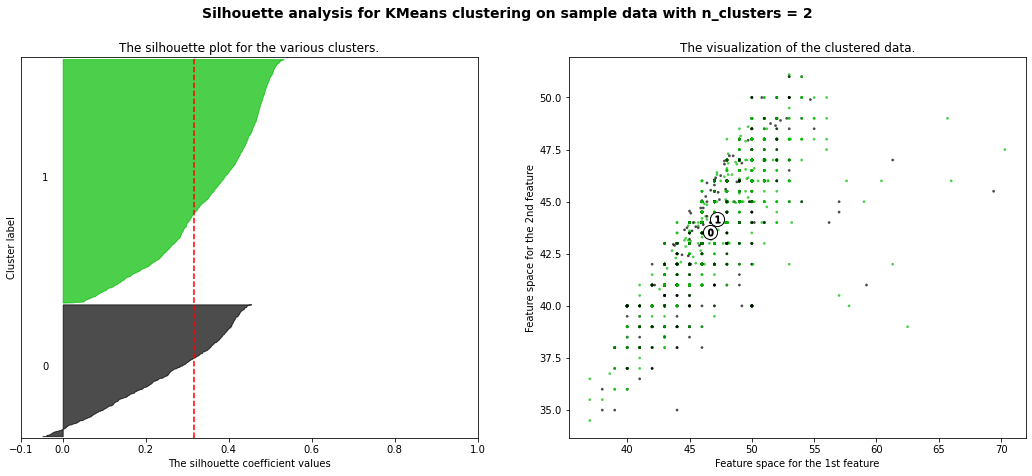

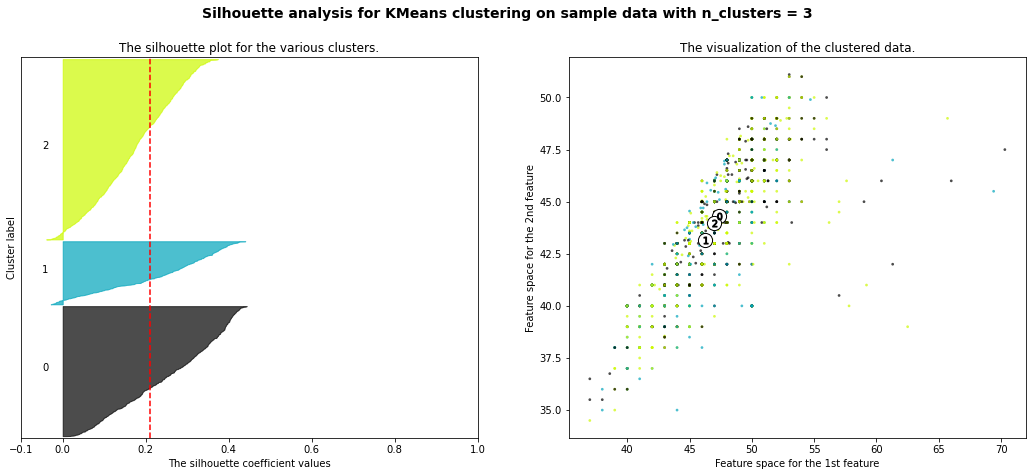

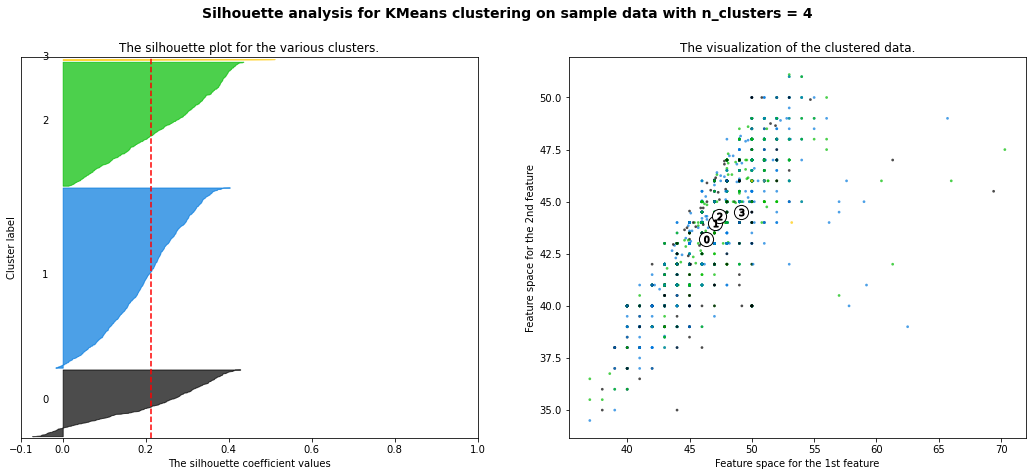

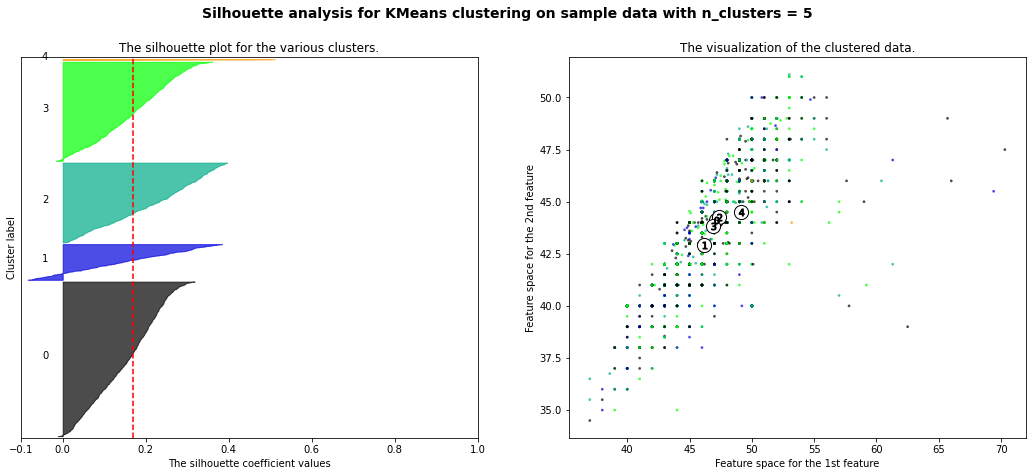

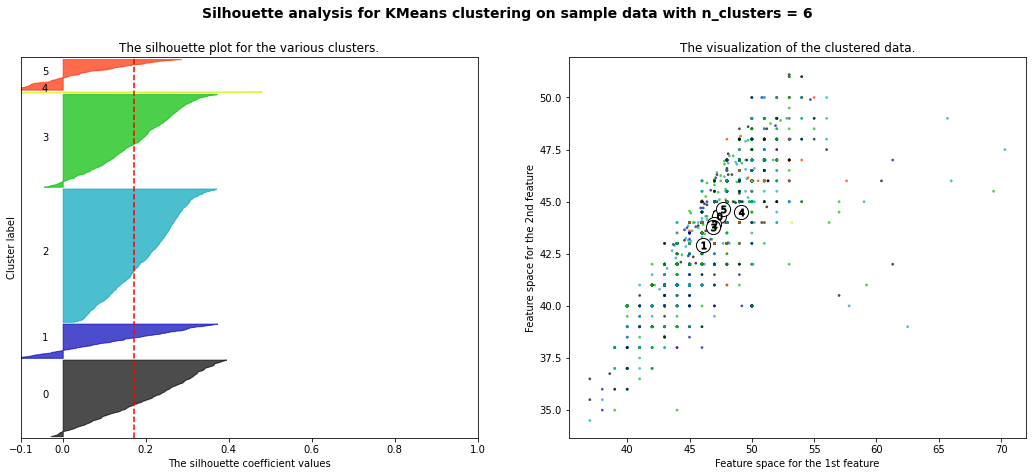

In [83]:
# Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_als_new) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_als_new)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_als_new, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_als_new, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        df_als_new.iloc[:, 0], df_als_new.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [84]:
# Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.
n_clusters = 2

From the silhouette analysis, we can determine that the silhouette_score continues to reduce closer to 0 as the number of clusters increases from 2.  Even at 2, the clusters provide a silhouette score of 31.52% where a typical optimal score would be around 60%.  Since the numbers are continuously dwindling, it makes sense to cap the number of clusters to reduce the impact on the overall score.

In [118]:
# Fit a PCA transformation with two features to the scaled data.
from sklearn.decomposition import PCA

pca_two = PCA(n_components = 2)
X_pca = pca_two.fit_transform(scaled)

# Fit a K-means model to the data with the optimal number of clusters chosen in part (4).
kmeans = KMeans(n_clusters=3, random_state=10)
y_pred = clusterer.fit_predict(scaled)

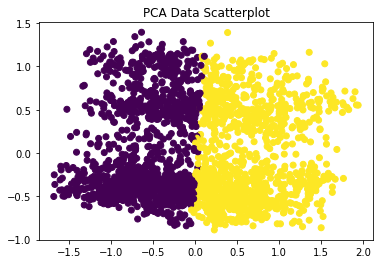

In [120]:
# Make a scatterplot the PCA transformed data coloring each point by its cluster value.
# plot the data
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred)
plt.title('PCA Data Scatterplot')
plt.show()

In [123]:
# Show the variance between the two features within the PCA.
explained_variance = pca_two.explained_variance_ratio_
explained_variance

array([0.27234005, 0.14949741])

In [126]:
from scipy.stats import ttest_ind

# Split the data into two groups based on the cluster labels
group1 = X_pca[y_pred == 0,:]
group2 = X_pca[y_pred == 1,:]

# Perform a t-test to compare the means of the two groups
t, p = ttest_ind(group1, group2, axis=0)

# Get the number of features
num_features = X_pca.shape[1]

# Print the t-statistic and p-value for each feature
for i in range(num_features):
    print(f"Feature {i}: t = {t[i]:.3f}, p = {p[i]:.3f}")

Feature 0: t = -70.631, p = 0.000
Feature 1: t = 3.618, p = 0.000


## Summarize your results and make a conclusion.


With the assistance of some additional testing, we can see that the t-values for the first group is large which may indicate a large difference between the means.  This was confirmed with the scatterplot that was performed prior.  However, both p-values result in 0.000 which indicate a statistical signficance from the difference of the two means.  